# 自适应引力算法

In [3]:
import numpy as np
from 优化目标 import *

In [290]:
particles_dim = 6 #粒子维度
particles_num = 10 #粒子数量
max_iter = 48 #最大迭代次数

particles_UP = np.ones(particles_dim) *5.12 #粒子上界
particles_DOWN = np.ones(particles_dim) * (-5.12) #粒子下界



def start():
    #初始化,平铺
    particles = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        for j in range(particles_dim):
            particles[i][j] = np.random.uniform(particles_DOWN[j],particles_UP[j])
    

            
            
    return particles

def restart():
    #重新初始化单个粒子
    particle = np.zeros(particles_dim)
    for i in range(particles_dim):
        particle[i] = np.random.uniform(particles_DOWN[i],particles_UP[i])
    return particle

def check(particle):
    #检查单个粒子是否超出边界
    for i in range(particles_dim):
        if particle[i] > particles_UP[i] or particle[i] < particles_DOWN[i]:
            return False
    return True

def fitness(particle):
    #计算单个粒子适应度
    #
    return -np.sum(np.square(particle-3))
    

def cal_distance(particles,i,j):
    #计算粒子间距离
    #归一化 到上下界
    return np.sqrt(np.sum(np.square((particles[i] - particles[j]) / (particles_UP - particles_DOWN))))

def cal_mass(fitnesses,best_fitness, worst_fitness):
    #计算所有质量
    if best_fitness == worst_fitness:
        print("best_fitness == worst_fitness")
    masses = np.zeros(particles_num)
    for i in range(particles_num):
        
        masses[i] = (fitnesses[i] - worst_fitness) / (best_fitness - worst_fitness)
        
    m_sum = np.sum(masses)
    if m_sum == 0:
        return np.ones(particles_num)
    M=np.zeros(particles_num)
    for i in range(particles_num):
        if(masses[i] == 0):
            M[i] = 0.1
        else:
            M[i] = masses[i] / m_sum
        
    return M

def cal_G(alpha,G0,Imax,t):
    #计算引力常数
    return G0 * np.exp(-alpha * t / Imax)

def cal_F(G,M,particles,i,j):
    #计算引力
    F = np.zeros(particles_dim)
    for k in range(particles_dim):
        if(particles[i][k] - particles[j][k] == 0):
            F[k] = 0
        else:
            F[k]= (G * M[i] * M[j]  / (cal_distance(particles,i,j) + 1e-8 ) ) *((particles[j][k] - particles[i][k]) /(particles_UP[k] - particles_DOWN[k]) )

    if(np.isnan(F).any()):
        print("F:",F,i,j)
    return F

def cal_all_F(G,M,particles,particles_fitness):
    #计算所有粒子受到的引力
    F = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        for j in range(particles_num):
            if i != j :
                #and ( particles_fitness[i] <= particles_fitness[j] or np.abs(particles_fitness[i] - particles_fitness[j]) < np.abs(0.5*particles_fitness[i] ))
                #每个维度随机0-1
                F[i] += cal_F(G,M,particles,i,j) *(1-0.5*np.random.rand(particles_dim))
                if(np.isnan(F[i]).any()):
                    print("F[i]:",F[i])
    return F

def cal_all_a(F,M):
    #计算所有粒子加速度
    a = np.zeros((particles_num,particles_dim))
    for i in range(particles_num):
        if M[i] == 0:
            a[i] = 0
        else:
            a[i] = F[i] / M[i]
    return a

def cal_all_v(v,a):
    #计算所有粒子速度
    v = v *np.random.rand(particles_dim) + a
    if(np.isnan(v).any()):
        print("v:",v)
    return v

def cal_all_x(x,v):
    #计算所有粒子位置
    x = x + v
    if(np.isnan(x).any()):
        print("x:",x)
    return x

#自适应部分
#计算离散度,即到群体中心的平均距离
def cal_discrete(particles):
    center = np.zeros(particles_dim)
    for i in range(particles_dim):
        center[i] = np.mean(particles[:,i])
    dis = 0
    for i in range(particles_num):
        for j in range(particles_dim):
            dis += np.square(particles[i][j] - center[j])
    return np.sqrt(dis / particles_num /particles_dim )
    

# alpha
ALPHA_S = 0 #S的值为当R=0.2R0时的alpha
def cal_alpha(R0,R,t):
    global ALPHA_S
    global max_iter
    A = 13
    B = 5
    if(R>=0.6*R0):
        print("第一阶段")
        return A
    if(R>=0.2*R0 and R<0.6*R0):
        print("第二阶段")
        return A+B*(np.cos((t/max_iter)*np.pi + np.pi)+1)
    if(R>=0 and R<0.2*R0):
        print("第三阶段")
        if ALPHA_S == 0:
            ALPHA_S = A+B*(np.cos((t/max_iter)*np.pi + np.pi)+1)
        u=(t*ALPHA_S)/max_iter - ALPHA_S/2
        return A+(B/1+np.exp(-u))

# G0
def cal_G0(t):
    global max_iter
    M = 100
    N=30
    return M+N*(np.cos((t/max_iter)*np.pi)-1)



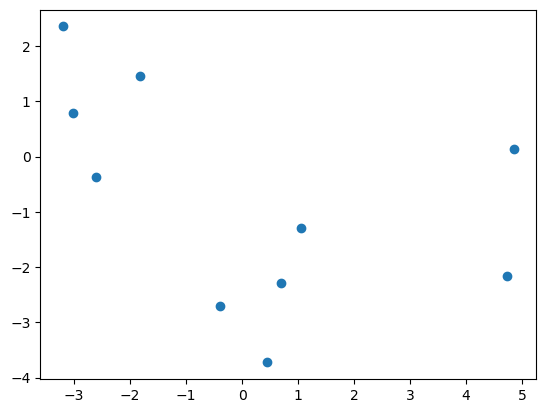

第一阶段
粒子超出边界: [  9.71042023 -18.40324121 -29.08226804  -4.18049802 -28.76334089
  17.43675537] 重置
重置后: [ 1.19807647 -3.02223383  0.57835155 -1.4781692   3.51077868  4.9996004 ]
粒子超出边界: [ 23.22957094  -0.89718644  -0.08224063 -11.90070806 -16.1504645
  -8.12559105] 重置
重置后: [-3.34517321 -3.82133826  0.16064209 -4.74179218  3.32985045 -2.78410129]
粒子超出边界: [-12.01878685  15.18925669 -28.18945299  -3.84913979  -7.65284244
  -4.63343881] 重置
重置后: [ 1.64596989  0.7119741   2.23358179  4.91364049  1.30897386 -1.88665778]
粒子超出边界: [-32.86167793  -7.46209346  23.37561836  -2.4851751   16.20774975
   9.23290602] 重置
重置后: [-4.80031809 -1.74881218  4.47706236 -2.63614293 -3.48076367  4.97314961]
粒子超出边界: [  1.79544765  15.99347942  23.74303687 -10.14787555  26.71273807
 -35.78384483] 重置
重置后: [ 1.68823605 -1.00052793 -1.73994923 -3.52644504  0.46077959  3.70316173]
粒子超出边界: [-25.38711624   7.90576775 -25.46078074  35.49591805  21.82423438
  -7.22732376] 重置
重置后: [-2.78715095 -1.39625741 -4.57411979 -1.3510

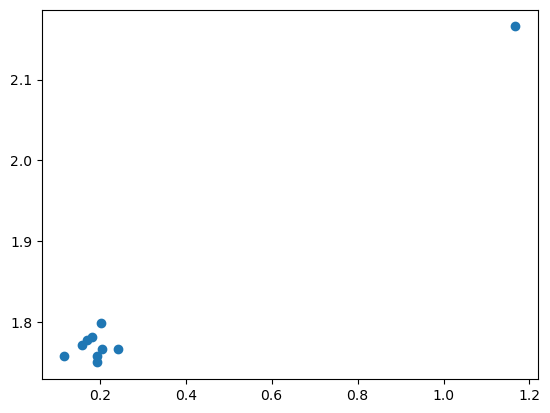

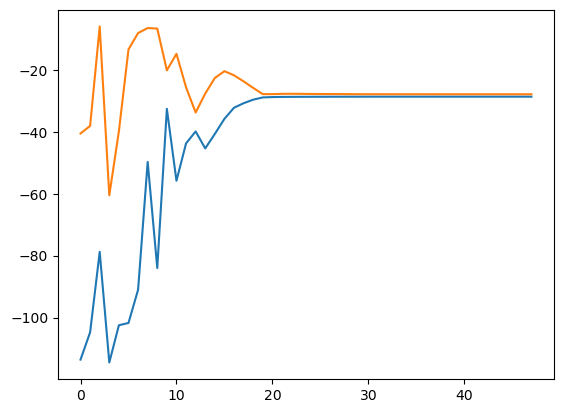

In [291]:
# #测试
# test_real_min = np.zeros(particles_dim)
# print(test_real_min)
# def fit_test(x):
#     fit= - np.sum(np.square(x-1))
#     if  np.isnan(fit):
#         print("fit nan",x)
#     if np.isinf(fit):
#         print("fit inf",x)
#         #就报错
        
import matplotlib.pyplot as plt
#     return fit
ALPHA_S = 0 
particles = start()
#画出初始粒子分布
plt.scatter(particles[:,0],particles[:,1])
plt.show()
#particles_v = np.random.rand(particles_num, particles_dim)*2 -1#粒子速度
particles_v = np.zeros((particles_num, particles_dim))#粒子速度

#particles_a = np.random.rand(particles_num, particles_dim)*2 -1#粒子加速度
particles_a = np.zeros((particles_num, particles_dim))#粒子加速度
particles_fitness = [fitness(particles[i]) for i in range(particles_num)]#粒子适应度
particles_best_fitness = np.max(particles_fitness)
particles_best_pos = particles[np.argmax(particles_fitness)]
particles_worst_fitness = np.min(particles_fitness)
particles_worst_pos = particles[np.argmin(particles_fitness)]

particle_history_best_pos = particles_best_pos #全局最优
particle_history_best_fitness = particles_best_fitness #全局最优适应度

#初始离散度
R0 = cal_discrete(particles)

stop_iter = 0
#统计
mean_fitness = np.zeros(max_iter)
best_fitness = np.zeros(max_iter)
for i in range(max_iter):
    #检查所有粒子是否超出边界
    for j in range(particles_num):
        if not check(particles[j]):
            print("粒子超出边界:",particles[j],"重置")
            particles[j] = restart()
            #速度,加速度置0
            particles_v[j] = np.zeros(particles_dim)
            particles_a[j] = np.zeros(particles_dim)
            print("重置后:",particles[j])
    #计算所有粒子适应度
    particles_fitness = [fitness(particles[i]) for i in range(particles_num)]
    mean_fitness[i] = np.mean(particles_fitness)
    #print("particles",particles_fitness)
    #计算所有粒子最优
    particles_best_fitness = np.max(particles_fitness)
    #print("particles_best_fitness:",particles_best_fitness)
    particles_best_pos = particles[np.argmax(particles_fitness)]
    if(particles_best_fitness > particle_history_best_fitness):
        particle_history_best_fitness = particles_best_fitness
        particle_history_best_pos = particles_best_pos
        stop_iter = 0
    else:
        stop_iter += 1
    best_fitness[i] = particles_best_fitness
    #计算所有粒子最差
    particles_worst_fitness = np.min(particles_fitness)
    #print("particles_worst_fitness:",particles_worst_fitness)
    particles_worst_pos = particles[np.argmin(particles_fitness)]
    #计算所有粒子质量
    particles_mass = cal_mass(particles_fitness,particles_best_fitness,particles_worst_fitness)

    ####
    #自适应部分
    R = cal_discrete(particles)
    #print("R:",R)
    alpha = cal_alpha(R0,R,i)
    #print("alpha:",alpha)
    G0 = cal_G0(i)
    ####
    #计算引力常数
    particles_G = cal_G(alpha,G0,max_iter,i)
    #计算所有粒子受到的引力
    particles_F = cal_all_F(particles_G,particles_mass,particles,particles_fitness)

    #计算所有粒子加速度
    particles_a = cal_all_a(particles_F,particles_mass)
    
    #计算所有粒子速度
    particles_v = cal_all_v(particles_v,particles_a)

    #计算所有粒子位置
    particles = cal_all_x(particles,particles_v)
    
    
    
    #print(particles_best_pos)
    #停止条件:最优适应度大于阈值,或者全局最优适应度不变一定次数
    #if particles_best_fitness > -0.0001:
    if stop_iter > 100:
        break
print("最优适应度:",particle_history_best_fitness)
print("最优位置:",particle_history_best_pos)
#
plt.scatter(particles[:,0],particles[:,1])
plt.show()
plt.plot(mean_fitness)
plt.plot(best_fitness)

plt.show()